In [173]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

/kaggle/input/microsoft-adventure-works-cycles-customer-data/AWCustomers.csv
/kaggle/input/microsoft-adventure-works-cycles-customer-data/AWTest-Classification.csv
/kaggle/input/microsoft-adventure-works-cycles-customer-data/AWSales.csv
/kaggle/input/microsoft-adventure-works-cycles-customer-data/AWTest-Regression.csv


In [174]:
oCustomer = pd.read_csv('/kaggle/input/microsoft-adventure-works-cycles-customer-data/AWCustomers.csv')
oSales = pd.read_csv('/kaggle/input/microsoft-adventure-works-cycles-customer-data/AWSales.csv')

In [175]:
odf = oCustomer.merge(oSales,on='CustomerID')

In [176]:
odf.head()

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,LastUpdated,BikeBuyer,AvgMonthSpend
0,21173,NaN,Chad,C,Yuan,NaN,7090 C. Mount Hood,NaN,Wollongong,New South Wales,...,M,M,1,3,0,1,81916,2017-03-06,1,50.97
1,13249,NaN,Ryan,NaN,Perry,NaN,3651 Willow Lake Rd,NaN,Shawnee,British Columbia,...,M,M,1,2,1,2,81076,2017-03-06,1,53.11
2,29350,NaN,Julia,NaN,Thompson,NaN,1774 Tice Valley Blvd.,NaN,West Covina,California,...,F,S,0,3,0,0,86387,2017-03-06,1,54.08
3,13503,NaN,Theodore,NaN,Gomez,NaN,2103 Baldwin Dr,NaN,Liverpool,England,...,M,M,1,2,1,2,61481,2017-03-06,1,56.93
4,22803,NaN,Marshall,J,Shan,NaN,Am Gallberg 234,NaN,Werne,Nordrhein-Westfalen,...,M,S,1,1,0,0,51804,2017-03-06,1,55.41


In [177]:
odf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18361 entries, 0 to 18360
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustomerID            18361 non-null  int64  
 1   Title                 101 non-null    object 
 2   FirstName             18361 non-null  object 
 3   MiddleName            10572 non-null  object 
 4   LastName              18361 non-null  object 
 5   Suffix                3 non-null      object 
 6   AddressLine1          18361 non-null  object 
 7   AddressLine2          311 non-null    object 
 8   City                  18361 non-null  object 
 9   StateProvinceName     18361 non-null  object 
 10  CountryRegionName     18361 non-null  object 
 11  PostalCode            18361 non-null  object 
 12  PhoneNumber           18361 non-null  object 
 13  BirthDate             18361 non-null  object 
 14  Education             18361 non-null  object 
 15  Occupation         

In [178]:
ndf = odf.drop(['CustomerID','Title','FirstName','MiddleName','LastName','Suffix','AddressLine1','AddressLine2','City','StateProvinceName','CountryRegionName','PostalCode','PhoneNumber','LastUpdated'],axis=1)

In [179]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18361 entries, 0 to 18360
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   BirthDate             18361 non-null  object 
 1   Education             18361 non-null  object 
 2   Occupation            18361 non-null  object 
 3   Gender                18361 non-null  object 
 4   MaritalStatus         18361 non-null  object 
 5   HomeOwnerFlag         18361 non-null  int64  
 6   NumberCarsOwned       18361 non-null  int64  
 7   NumberChildrenAtHome  18361 non-null  int64  
 8   TotalChildren         18361 non-null  int64  
 9   YearlyIncome          18361 non-null  int64  
 10  BikeBuyer             18361 non-null  int64  
 11  AvgMonthSpend         18361 non-null  float64
dtypes: float64(1), int64(6), object(5)
memory usage: 1.7+ MB


In [180]:
ndf['BirthDate'] = pd.to_datetime(ndf['BirthDate'])
ndf["Age"]=(pd.to_datetime('2024-09-01') - ndf['BirthDate'])
ndf.drop('BirthDate',axis=1,inplace=True)

In [181]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18361 entries, 0 to 18360
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype          
---  ------                --------------  -----          
 0   Education             18361 non-null  object         
 1   Occupation            18361 non-null  object         
 2   Gender                18361 non-null  object         
 3   MaritalStatus         18361 non-null  object         
 4   HomeOwnerFlag         18361 non-null  int64          
 5   NumberCarsOwned       18361 non-null  int64          
 6   NumberChildrenAtHome  18361 non-null  int64          
 7   TotalChildren         18361 non-null  int64          
 8   YearlyIncome          18361 non-null  int64          
 9   BikeBuyer             18361 non-null  int64          
 10  AvgMonthSpend         18361 non-null  float64        
 11  Age                   18361 non-null  timedelta64[ns]
dtypes: float64(1), int64(6), object(4), timedelta64[ns](1)
memor

In [182]:
print("Education -> ",ndf['Education'].isna().sum())
print("Occupation -> ",ndf['Occupation'].isna().sum())
print("Gender -> ",ndf['Gender'].isna().sum())
print("MaritalStatus -> ",ndf['MaritalStatus'].isna().sum())

Education ->  0
Occupation ->  0
Gender ->  0
MaritalStatus ->  0


In [183]:
print("Education -> ",ndf['Education'].nunique())
print("Occupation -> ",ndf['Occupation'].nunique())
print("Gender -> ",ndf['Gender'].nunique())
print("MaritalStatus -> ",ndf['MaritalStatus'].nunique())

Education ->  5
Occupation ->  5
Gender ->  2
MaritalStatus ->  2


In [184]:
ndf['Education'] = pd.Categorical(ndf['Education']).codes
ndf['Gender'] = pd.Categorical(ndf['Gender']).codes
ndf['Occupation'] = pd.Categorical(ndf['Occupation']).codes
ndf['MaritalStatus'] = pd.Categorical(ndf['MaritalStatus']).codes

In [185]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18361 entries, 0 to 18360
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype          
---  ------                --------------  -----          
 0   Education             18361 non-null  int8           
 1   Occupation            18361 non-null  int8           
 2   Gender                18361 non-null  int8           
 3   MaritalStatus         18361 non-null  int8           
 4   HomeOwnerFlag         18361 non-null  int64          
 5   NumberCarsOwned       18361 non-null  int64          
 6   NumberChildrenAtHome  18361 non-null  int64          
 7   TotalChildren         18361 non-null  int64          
 8   YearlyIncome          18361 non-null  int64          
 9   BikeBuyer             18361 non-null  int64          
 10  AvgMonthSpend         18361 non-null  float64        
 11  Age                   18361 non-null  timedelta64[ns]
dtypes: float64(1), int64(6), int8(4), timedelta64[ns](1)
memory 

In [186]:
print("HomeOwnerFlag -> ",ndf['HomeOwnerFlag'].isna().sum())
print("NumberCarsOwned -> ",ndf['NumberCarsOwned'].isna().sum())
print("NumberChildrenAtHome -> ",ndf['NumberChildrenAtHome'].isna().sum())
print("TotalChildren -> ",ndf['TotalChildren'].isna().sum())
print("YearlyIncome -> ",ndf['YearlyIncome'].isna().sum())
print("BikeBuyer -> ",ndf['BikeBuyer'].isna().sum())
print("AvgMonthSpend -> ",ndf['AvgMonthSpend'].isna().sum())
print("Age -> ",ndf['Age'].isna().sum())

HomeOwnerFlag ->  0
NumberCarsOwned ->  0
NumberChildrenAtHome ->  0
TotalChildren ->  0
YearlyIncome ->  0
BikeBuyer ->  0
AvgMonthSpend ->  0
Age ->  0


In [187]:
ndf['ChildrenAlong'] = ndf['TotalChildren']-ndf['NumberChildrenAtHome']
ndf = ndf.drop(['NumberChildrenAtHome','TotalChildren'],axis=1)

In [191]:
ndf['Age'] = ndf['Age'].dt.days 

In [193]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18361 entries, 0 to 18360
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Education        18361 non-null  int8   
 1   Occupation       18361 non-null  int8   
 2   Gender           18361 non-null  int8   
 3   MaritalStatus    18361 non-null  int8   
 4   HomeOwnerFlag    18361 non-null  int64  
 5   NumberCarsOwned  18361 non-null  int64  
 6   YearlyIncome     18361 non-null  int64  
 7   BikeBuyer        18361 non-null  int64  
 8   AvgMonthSpend    18361 non-null  float64
 9   Age              18361 non-null  int64  
 10  ChildrenAlong    18361 non-null  int64  
dtypes: float64(1), int64(6), int8(4)
memory usage: 1.1 MB


In [197]:
import seaborn as sns
import matplotlib.pyplot as plt

{'whiskers': [<matplotlib.lines.Line2D at 0x7ba801054550>,
 'caps': [<matplotlib.lines.Line2D at 0x7ba801057be0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ba801055060>],
 'medians': [<matplotlib.lines.Line2D at 0x7ba801056e90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ba801056ec0>],
 'means': []}

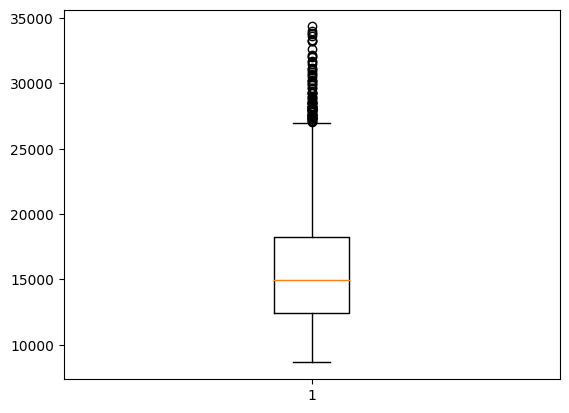

In [201]:
# plt.boxplot([ndf['Age']])
# No need to handle Outliers for such columns (any mentioned above in this df)

In [ ]:
# Using Z-Score, because it ensures that features contribute equally to the model.

In [212]:
from sklearn.preprocessing import StandardScaler
scalerr = StandardScaler()

In [206]:
# columns to normalize are:
col = ['YearlyIncome', 'AvgMonthSpend','Age']

In [208]:
ndf

,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,YearlyIncome,BikeBuyer,AvgMonthSpend,Age,ChildrenAlong
0,0,0,1,0,1,3,81916,1,50.97,13442,1
1,3,0,1,0,1,2,81076,1,53.11,19035,1
2,0,0,0,1,0,3,86387,1,54.08,14176,0
3,3,4,1,0,1,2,61481,1,56.93,17120,1
4,3,4,1,1,1,1,51804,1,55.41,18106,0
...,...,...,...,...,...,...,...,...,...,...,...
18356,1,4,0,0,0,1,52953,0,48.14,12348,2
18357,0,4,0,1,0,2,60992,1,50.23,11646,0
18358,3,4,0,1,0,2,51859,1,49.56,14892,0
18359,2,0,0,1,0,0,87177,0,51.42,10671,0


In [215]:
ndf[col] = scalerr.fit_transform(ndf[col])

In [217]:
ndf

,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,YearlyIncome,BikeBuyer,AvgMonthSpend,Age,ChildrenAlong
0,0,0,1,0,1,3,0.298555,1,-0.231774,-0.515315,1
1,3,0,1,0,1,2,0.271180,1,0.390755,0.845590,1
2,0,0,0,1,0,3,0.444261,1,0.672929,-0.336716,0
3,3,4,1,0,1,2,-0.367401,1,1.501999,0.379627,1
4,3,4,1,1,1,1,-0.682765,1,1.059828,0.619543,0
...,...,...,...,...,...,...,...,...,...,...,...
18356,1,4,0,0,0,1,-0.645321,0,-1.055025,-0.781510,2
18357,0,4,0,1,0,2,-0.383337,1,-0.447041,-0.952323,0
18358,3,4,0,1,0,2,-0.680973,1,-0.641945,-0.162497,0
18359,2,0,0,1,0,0,0.470006,0,-0.100868,-1.189562,0


**Data has been Pre-Processed. Now time to Split it into Test and Training Data and Train the Model.**

In [227]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [220]:
tdf = ndf

In [222]:
X = tdf.drop('BikeBuyer', axis=1)
y = tdf['BikeBuyer']

In [228]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Training with Random Forest**

In [230]:
from sklearn.ensemble import RandomForestClassifier

In [231]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [232]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.76
